# Analisis exploratorio de datos (aka E.D.A) 

## Conjunto de datos a explorar: `clicks`

In [1]:
import pandas as pd
import numpy as np

from IPython.display import display, Markdown as md
import seaborn as sns
import matplotlib.pyplot as plt

### Carga de los datos
> Tomamos como precondicion que el campo `created` es una fecha del tipo de dato datetime[64]

In [2]:
 clicks = pd.read_csv("../data/clicks.csv.gzip", parse_dates=["created"], compression='gzip')

### Informacion sobre el conjunto de datos

In [3]:
clicks.shape

(26351, 20)

In [4]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null datetime64[ns]
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(11), int64(6), object(

### Cantidad de Nulos

In [5]:
clicks.isna().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

## Tratamiento por atributo

In [6]:
columns_names = sorted(clicks.columns.values)
print(columns_names)

['action_id', 'advertiser_id', 'agent_device', 'brand', 'carrier_id', 'country_code', 'created', 'latitude', 'longitude', 'os_major', 'os_minor', 'ref_hash', 'ref_type', 'source_id', 'specs_brand', 'timeToClick', 'touchX', 'touchY', 'trans_id', 'wifi_connection']


### `action_id `

In [7]:
clicks['action_id'].head(10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: action_id, dtype: float64

In [8]:
clicks['action_id'].isna().sum()

26351

In [9]:
clicks['action_id'].unique()

array([nan])

> El atributo o columna `action_id` en todas sus filas repite el valor `nan`, se procede a eliminar la columna.

In [10]:
clicks.drop(columns=['action_id'], inplace=True)

In [11]:
clicks.shape

(26351, 19)

### `advertiser_id `

In [12]:
clicks['advertiser_id'].head()

0    2
1    0
2    0
3    2
4    2
Name: advertiser_id, dtype: int64

In [13]:
clicks['advertiser_id'].value_counts()

3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

> `advertiser_id` es un atributo que contiene valores entre `[0..8]` se procede a cambiar el tipo de la columna a `int8`

In [14]:
clicks['advertiser_id'] = pd.to_numeric(clicks['advertiser_id'], downcast='integer')

In [15]:
clicks.shape

(26351, 19)

### `agent_device`

### `brand`

### `carrier_id`

In [16]:
clicks['carrier_id'].head(10)

0     1.0
1     4.0
2     6.0
3    45.0
4    45.0
5    27.0
6    27.0
7     NaN
8    19.0
9    18.0
Name: carrier_id, dtype: float64

In [17]:
clicks.fillna(value={'carrier_id':0}, inplace=True)
clicks['carrier_id'] = pd.to_numeric(clicks['carrier_id'], downcast='integer')
clicks['carrier_id'].head(10)

0     1
1     4
2     6
3    45
4    45
5    27
6    27
7     0
8    19
9    18
Name: carrier_id, dtype: int8

### `country_code`

In [18]:
clicks['country_code'].head(10)

0    6333597102633388268
1    6333597102633388268
2    6333597102633388268
3    6333597102633388268
4    6333597102633388268
5    6333597102633388268
6    6333597102633388268
7    6333597102633388268
8    6333597102633388268
9    6333597102633388268
Name: country_code, dtype: int64

In [19]:
clicks['country_code'].value_counts()

6333597102633388268    26351
Name: country_code, dtype: int64

In [20]:
clicks['country_code'].unique()

array([6333597102633388268])

> El atributo o columna `country_code` en todas sus filas repite el valor `6333597102633388268`, se procede a eliminar la columna.

In [21]:
clicks.drop(columns=['country_code'], inplace=True)

### `created`

In [22]:
clicks['created'].head(10)

0   2019-03-06 22:42:12.755
1   2019-03-08 10:24:30.641
2   2019-03-08 15:24:16.069
3   2019-03-06 03:08:51.543
4   2019-03-06 03:32:55.570
5   2019-03-07 18:02:25.833
6   2019-03-12 15:17:04.453
7   2019-03-06 19:15:47.249
8   2019-03-07 23:11:01.934
9   2019-03-07 23:06:30.642
Name: created, dtype: datetime64[ns]

> No se pueden tomar acciones sobre el atributo `created`

### `latitude`

In [23]:
clicks['latitude'].head(10)

0    1.205689
1    1.218924
2    1.205689
3    1.205689
4    1.205689
5    1.209638
6    1.209638
7    1.205393
8    1.205058
9    1.205689
Name: latitude, dtype: float64

> El atributo o columna `latitude` en sus filas `floats`, se procede a bajar la precision.

In [24]:
clicks['latitude'] = pd.to_numeric(clicks['latitude'], downcast='float')

### `longitude`

In [25]:
clicks['longitude'].head(10)

0    1.070234
1    1.071209
2    1.070234
3    1.070234
4    1.070234
5    1.064208
6    1.064208
7    1.077238
8    1.077332
9    1.070234
Name: longitude, dtype: float64

> El atributo o columna `latitude` en sus filas `floats`, se procede a bajar la precision.

In [26]:
clicks['longitude'] = pd.to_numeric(clicks['longitude'], downcast='float')

### `os_major`

In [27]:
clicks['os_major'].head(10)

0    3.072849e+18
1    1.774085e+18
2    3.072849e+18
3    3.072849e+18
4    3.072849e+18
5    1.774085e+18
6    4.566454e+18
7             NaN
8    1.774085e+18
9    4.566454e+18
Name: os_major, dtype: float64

### `os_minor`

In [28]:
clicks['os_minor'].head(10)

0    6.768137e+18
1    3.025219e+18
2    5.975656e+18
3    6.768137e+18
4    6.768137e+18
5    3.025219e+18
6    3.378640e+18
7             NaN
8    3.025219e+18
9    3.378640e+18
Name: os_minor, dtype: float64

### `ref_hash`

 ### `ref_type`

### `source_id `

In [29]:
clicks['source_id'].head(10)

0    4
1    0
2    0
3    3
4    3
5    4
6    1
7    2
8    0
9    1
Name: source_id, dtype: int64

In [30]:
clicks['source_id'].value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

> `source_id` es un atributo que contiene valores entre `[0..10]` se procede a cambiar el tipo de la columna a `int8`

In [31]:
clicks['source_id'] = pd.to_numeric(clicks['source_id'], downcast='integer')

In [32]:
clicks.shape

(26351, 18)

### `specs_brand`

In [39]:
clicks['specs_brand'].head(10)

0    2733035977666442898
1     392184377613098015
2     392184377613098015
3    2733035977666442898
4    2733035977666442898
5     392184377613098015
6    2733035977666442898
7    8930605132947907029
8     392184377613098015
9    2733035977666442898
Name: specs_brand, dtype: int64

### `timeToClick`

In [41]:
clicks['timeToClick'].head(10)

0     1.563
1       NaN
2       NaN
3    19.013
4    28.110
5       NaN
6       NaN
7       NaN
8     3.129
9     1.707
Name: timeToClick, dtype: float64

### `touchX`

In [42]:
clicks['touchX'].head(10)

0    0.905
1      NaN
2    0.946
3    0.035
4    0.054
5    0.606
6      NaN
7      NaN
8    0.889
9    0.466
Name: touchX, dtype: float64

### `touchY`

In [43]:
clicks['touchY'].head(10)

0    0.078
1      NaN
2    0.473
3    0.431
4    0.423
5    0.459
6      NaN
7      NaN
8    0.977
9    0.985
Name: touchY, dtype: float64

### `trans_id`

In [33]:
clicks['trans_id'].head(10)

0    iGgClCM9exiHF4K31g94XmvHEBSLKIY
1    MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM
2    vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU
3    YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM
4    X5XTOcYQovkl6yadYdAD7xioVGU9jiY
5    dhc5iaRvlrI9OgkXDWnMRrAY47xWozY
6    cOm-_s2_6NkoDWYNu_QaMk-v4sf34h4
7    MbDYk_2nKmKtOQgAIRx-aDJ66VIGsrE
8    1wsFgNNvk6PT1QSSIdmmwmqp0E3k7io
9    ZLZz1XHsA5Xkuq_TXNfT49j_H4mfTwg
Name: trans_id, dtype: object

> No se pueden tomar acciones sobre el atributo `trans_id`

### `wifi_connection`

In [34]:
clicks['wifi_connection'].head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: wifi_connection, dtype: bool

In [35]:
clicks['wifi_connection'].unique()

array([False])

In [36]:
clicks['wifi_connection'].value_counts()

False    26351
Name: wifi_connection, dtype: int64

> El atributo o columna `wifi_connection` en todas sus filas repite el valor `nan`, se procede a eliminar la columna.

In [37]:
clicks.drop(columns=['wifi_connection'], inplace=True)

Text(0,0.5,'auction counts')

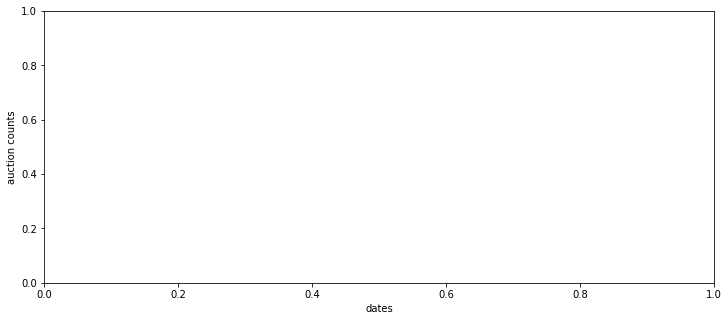

In [38]:
# Config
%matplotlib inline
#pd.options.display.max_columns = None
#plt.figure(figsize=(10, 10));
fig, ax = plt.subplots(figsize=(12,5))

ax.set_xlabel('dates')
ax.set_ylabel('auction counts')

#plt.bar(counts_by_day.index, counts_by_day.values)
#plt.show()